In [7]:
# The normal imports
import numpy as np
from numpy.random import randn
import pandas as pd

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

(array([ 2.,  0.,  0.,  1.,  6.,  2.,  2.,  4.,  9.,  6., 11.,  9.,  6.,
         3.,  7.,  6.,  3.,  1.,  0.,  2.]),
 array([-2.72581897, -2.47395268, -2.22208639, -1.9702201 , -1.71835381,
        -1.46648753, -1.21462124, -0.96275495, -0.71088866, -0.45902237,
        -0.20715608,  0.0447102 ,  0.29657649,  0.54844278,  0.80030907,
         1.05217536,  1.30404165,  1.55590793,  1.80777422,  2.05964051,
         2.3115068 ]),
 <a list of 20 Patch objects>)

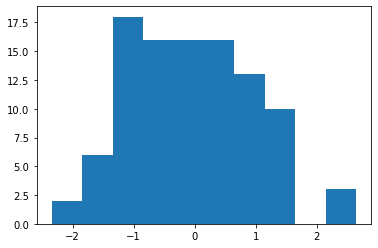

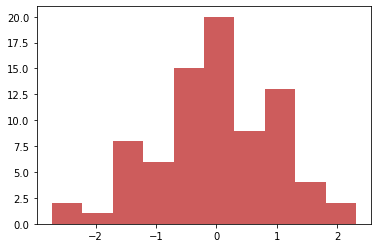

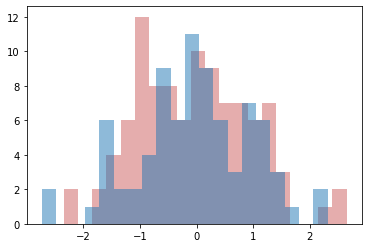

In [2]:
#HISTOGRAM
dataset1 = randn(100); #100 points
#Plot a histogram of the dataset, note bins=10 by default
plt.hist(dataset1)

#or
dataset2 = randn(80);
#Plot
plt.figure()
plt.hist(dataset2,color='indianred')

plt.figure()
plt.hist(dataset1, color='indianred', alpha=0.5, bins=20) #alpha --> transparency and bins --> descretes
plt.hist(dataset2, alpha=0.5, bins=20)

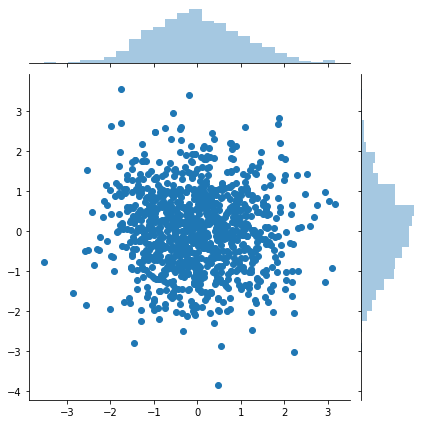

<Figure size 432x288 with 0 Axes>

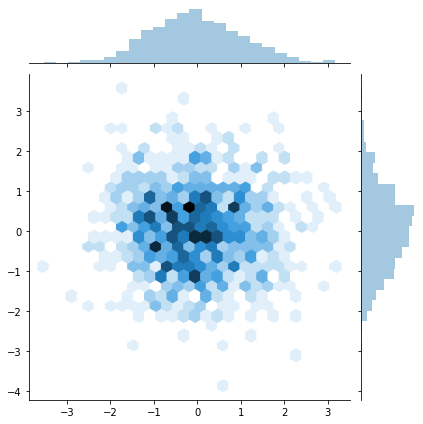

In [3]:
#SCATTER AND HISTOGRAM

# Make two more random normal dist data sets
data1 = randn(1000)
data2 = randn(1000)

#Can represent joint distributions using joint plots
sns.jointplot(data1, data2)

plt.figure()
# Can also use hex bins for a more concise picture
sns.jointplot(data1, data2, kind='hex')

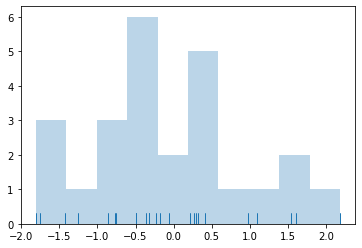

In [6]:
#RUGPLOT AND DOUBLE

# A rug plot simpot puts ticks wherever a value occured

#Create dataset
dataset = randn(25)
#Create rugplot
sns.rugplot(dataset)
#Set y-axis limit
#plt.ylim(0,1)

# Plot a histogram on top of 
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)

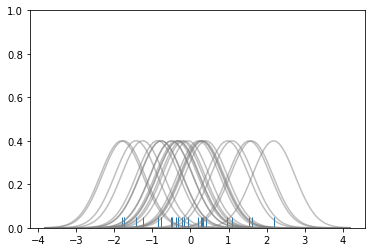

In [20]:
# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1);

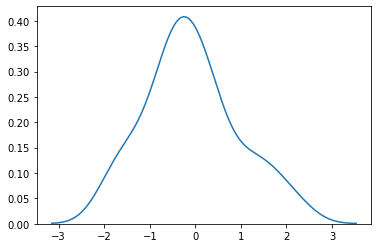

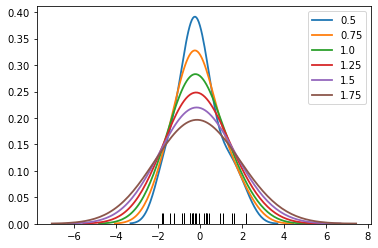

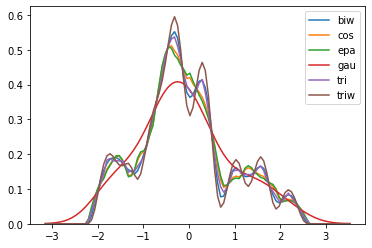

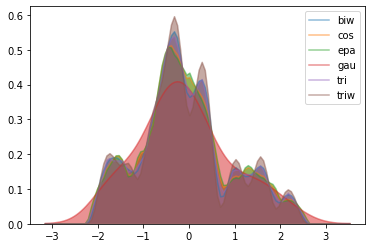

In [17]:
#KDE PLOT

sns.kdeplot(dataset);

#Adjust bandwidth

# Rugplot
plt.figure()
sns.rugplot(dataset,color='black')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=1.8,label=bw)
    
#Different KERNELS

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]
plt.figure()

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)
    
plt.figure()
# We can also shade if desired
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

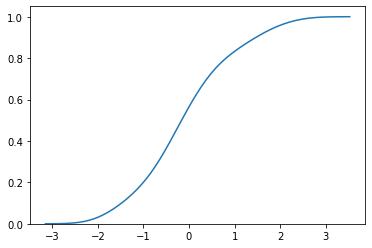

In [19]:
#CUMULATIVE DISTRIBUTION FUNCTION (CDF)
sns.kdeplot(dataset,cumulative=True);

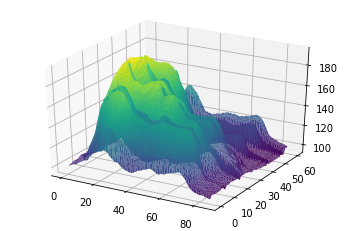

In [5]:
# library
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
 
# Get the data (csv file is hosted on the web)
url = 'https://python-graph-gallery.com/wp-content/uploads/volcano.csv'
data = pd.read_csv(url)
 
# Transform it to a long format
df=data.unstack().reset_index()
df.columns=["X","Y","Z"]
 
# And transform the old column name in something numeric
df['X']=pd.Categorical(df['X'])
df['X']=df['X'].cat.codes
 
# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()

 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar( surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()

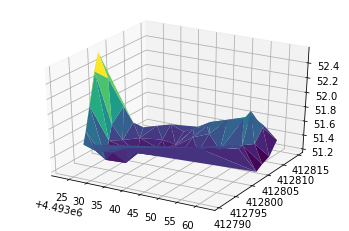

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame

data = pd.read_csv(r'ARXIKO.txt', header = None)
df = DataFrame({'Point':data[0], 'X':data[1], 'Y':data[2], 'Z':data[3]})
df.head()

# Make the plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
plt.show()
 
# to Add a color bar which maps values to colors.
surf=ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.viridis, linewidth=0.2)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
 
# Rotate it
ax.view_init(30, 45)
plt.show()
 
# Other palette
ax.plot_trisurf(df['Y'], df['X'], df['Z'], cmap=plt.cm.jet, linewidth=0.01)
plt.show()

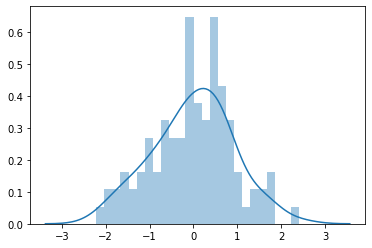

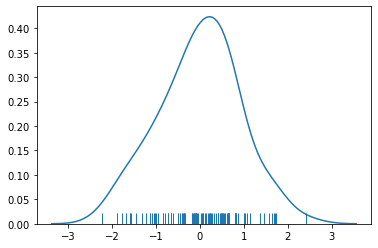

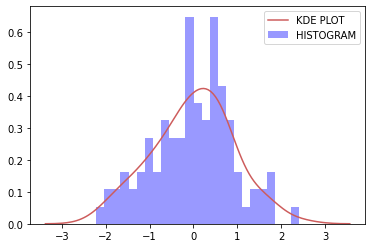

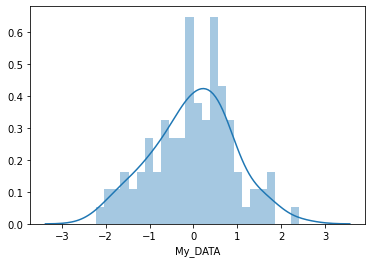

In [12]:
#COMBINING PLOTS
dataset = randn(100)

# Use distplot for combining plots, by default a kde over a histogram is shown
sns.distplot(dataset,bins=25);

plt.figure()
# hist, rug, and kde are all input arguments to turn those plots on or off
sns.distplot(dataset,rug=True,hist=False)

plt.figure()
sns.distplot(dataset,bins=25,
             kde_kws={'color':'indianred','label':'KDE PLOT'},
             hist_kws={'color':'blue','label':"HISTOGRAM"})

#WITH SERIES
from pandas import Series

# Create Series form dataset
ser1 = Series(dataset,name='My_DATA')

# Plot Series
plt.figure()
sns.distplot(ser1,bins=25)

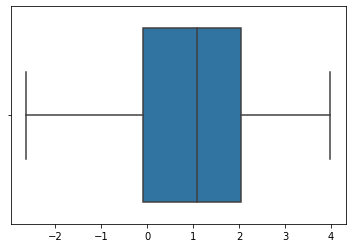

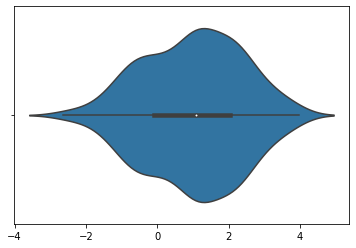

In [15]:
#BOX PLOT AND VIOLIN PLOT

# Let's create two distributions
data1 = randn(100)
data2 = randn(100) + 2 # Off set the mean
sns.boxplot([data1,data2]);

plt.figure()
# But lets check out what a violin plot reveals
sns.violinplot([data1,data2])

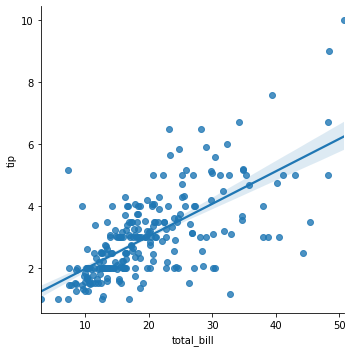

<Figure size 432x288 with 0 Axes>

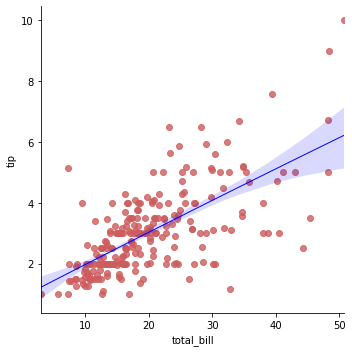

<Figure size 432x288 with 0 Axes>

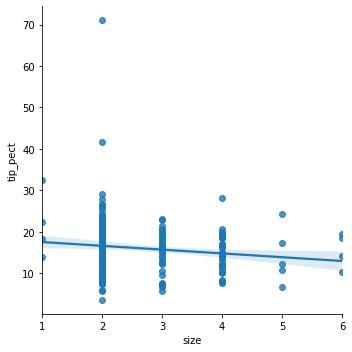

<Figure size 432x288 with 0 Axes>

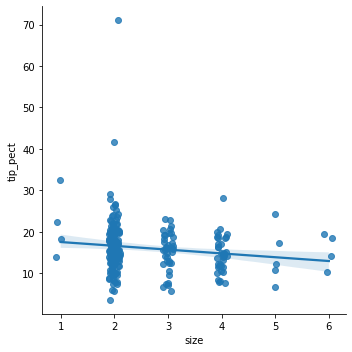

<Figure size 432x288 with 0 Axes>

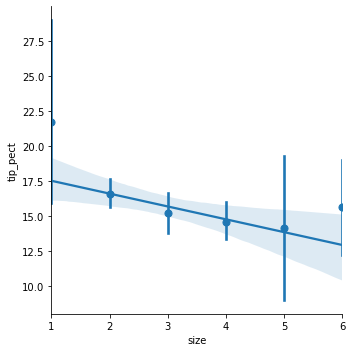

<Figure size 432x288 with 0 Axes>

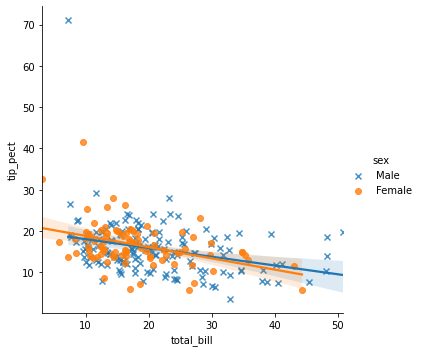

<Figure size 432x288 with 0 Axes>

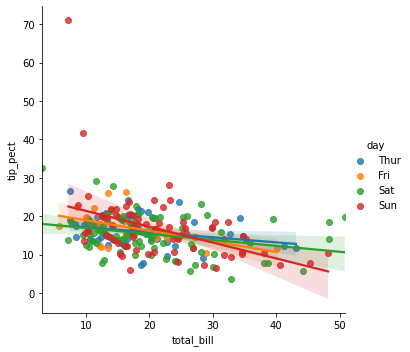

<Figure size 432x288 with 0 Axes>

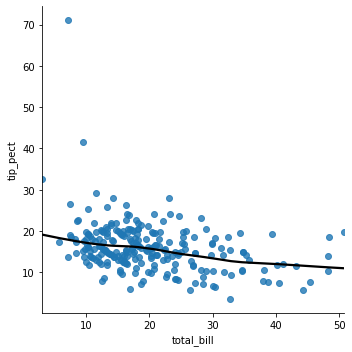

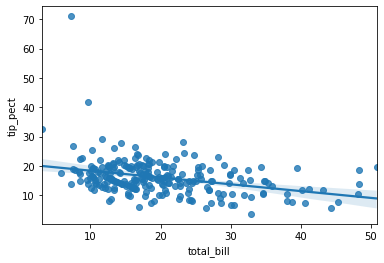

In [29]:
#REGRESSION

# Luckily, Seaborn comes with an example dataset to use as a pandas DataFrame
tips = sns.load_dataset("tips")
tips.head()

# Let's use lmplot() to plot the total bill versus tips with confidence 75%
sns.lmplot("total_bill","tip",tips,ci=75) # 75% ci

#more detailed
plt.figure();
# Just like before, we can use dictionaries to edit individual parts of the plot

sns.lmplot("total_bill", "tip", tips, order = 2, ci = 75,
           scatter_kws={"marker": "o", "color": "indianred"},
           line_kws={"linewidth": 1, "color": "blue"});

# Create a new column for tip percentage
tips["tip_pect"]=100*(tips['tip']/tips['total_bill'])
plt.figure();

#plot
sns.lmplot("size", "tip_pect", tips);

#plot
plt.figure();
sns.lmplot("size", "tip_pect", tips,x_jitter=.1);

# We can also estimate the tendency of each bin (size of party in this case)
plt.figure();
sns.lmplot("size", "tip_pect", tips, x_estimator=np.mean);

plt.figure();
# Plot, note the markers argument
sns.lmplot("total_bill", "tip_pect", tips, hue="sex",markers=["x","o"])

plt.figure();
# Does day make a difference?
sns.lmplot("total_bill", "tip_pect", tips, hue="day")

plt.figure();
# Finally it should be noted that Seabron supports LOESS model fitting
url = 'http://en.wikipedia.org/wiki/Local_regression'

sns.lmplot("total_bill", "tip_pect", tips, lowess=True, line_kws={"color": 'black'});

plt.figure();
sns.regplot("total_bill","tip_pect",tips)

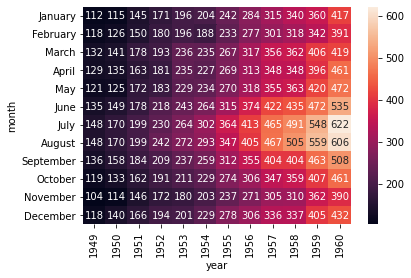

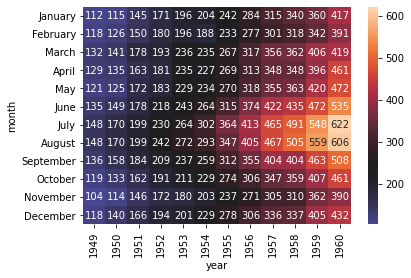

In [46]:
#HEATMAP AND CLUSTERED

# Again seaborn comes with a great dataset to play and learn with
flight_dframe = sns.load_dataset('flights')
flight_dframe.head()

# Let's pivot this dataframe do its easier to manage
flight_dframe = flight_dframe.pivot("month","year","passengers")

#Show
flight_dframe.head()

# We also have the option to annotate each cell
sns.heatmap(flight_dframe,annot=True,fmt='d')

plt.figure()
# We can choose our own 'center' for our colormap
sns.heatmap(flight_dframe,center=flight_dframe.loc['January',1955], annot=True,fmt='d');

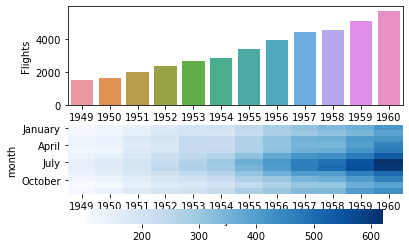

In [48]:
# heatmap() can be used on an axes for a subplot to create more informative figures
f, (axis1,axis2) = plt.subplots(2,1)

yearly_flights = flight_dframe.sum()

# Since yearly_flights is a weird format, we'll have to grab the values we want with a Series, then put them in a dframe

years = pd.Series(yearly_flights.index.values)
years = pd.DataFrame(years)

flights = pd.Series(yearly_flights.values) 
flights = pd.DataFrame(flights)

# Make the dframe and name columns
year_dframe = pd.concat((years,flights),axis=1)
year_dframe.columns = ['Year','Flights']

# Create the bar plot on top
sns.barplot('Year',y='Flights',data=year_dframe, ax = axis1)

# Create the heatmap on bottom
sns.heatmap(flight_dframe,cmap='Blues',ax=axis2,cbar_kws={"orientation": "horizontal"});

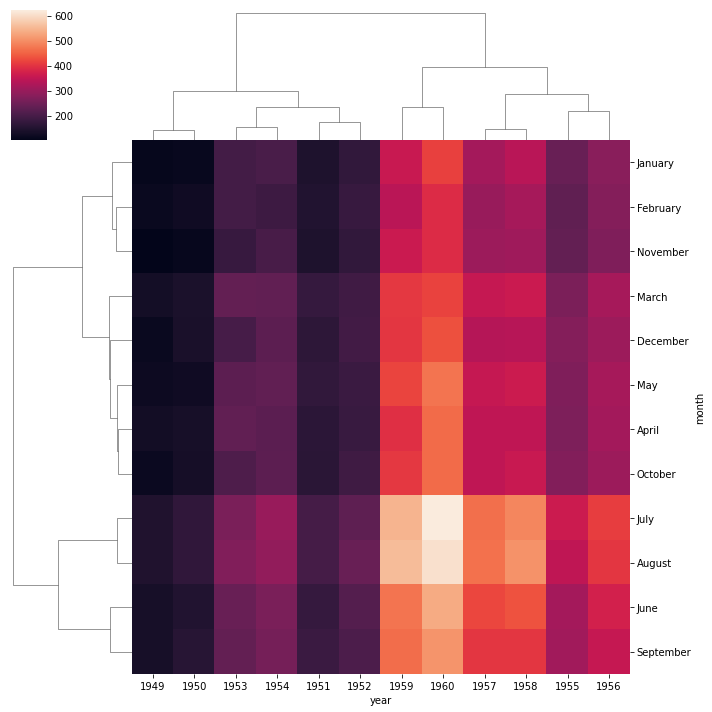

<Figure size 432x288 with 0 Axes>

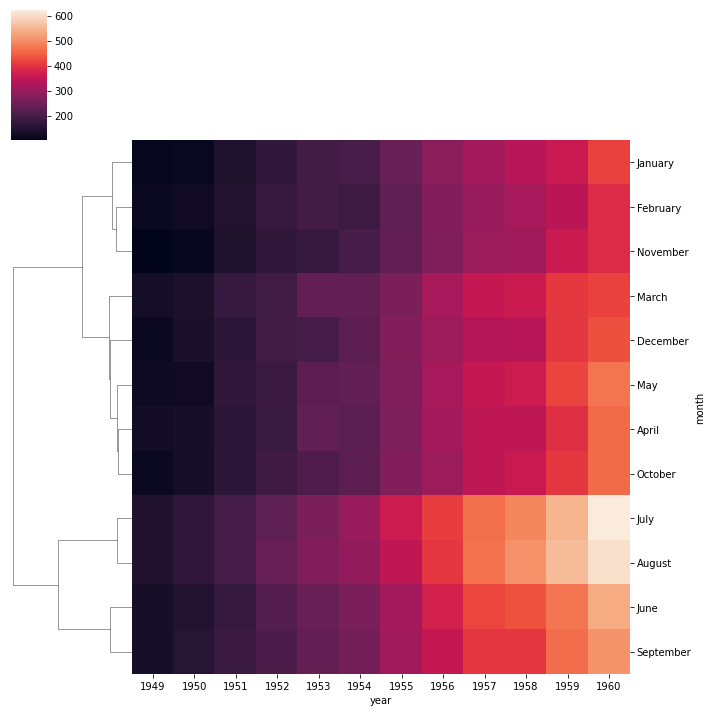

<Figure size 432x288 with 0 Axes>

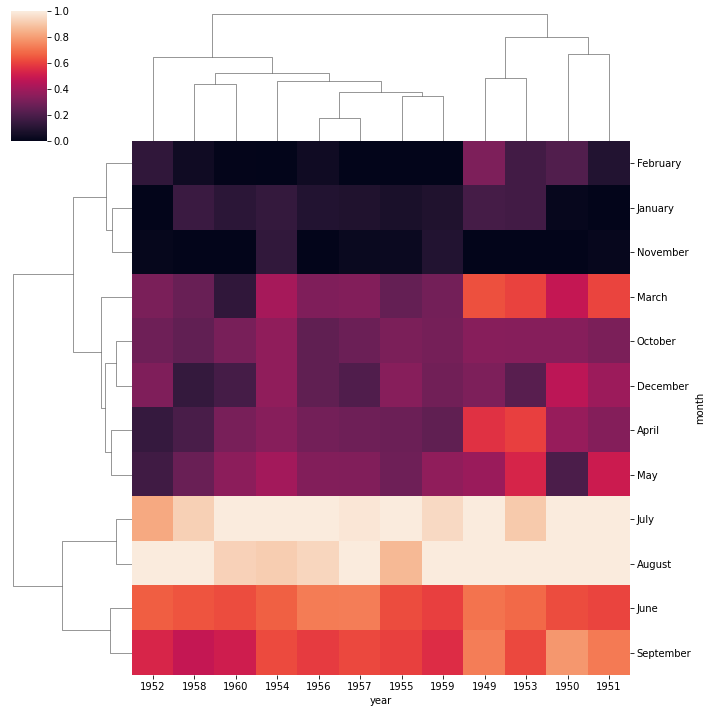

In [53]:
#CLUSTER MAP
# Clustermap will reformat the heatmap so similar rows are next to each other
sns.clustermap(flight_dframe);

plt.figure()
# Let's uncluster the columns
sns.clustermap(flight_dframe,col_cluster=False)

plt.figure()
# Since the number of flights increase every year, we should set a standard scale
sns.clustermap(flight_dframe,standard_scale=1) # standardize by columns (year)

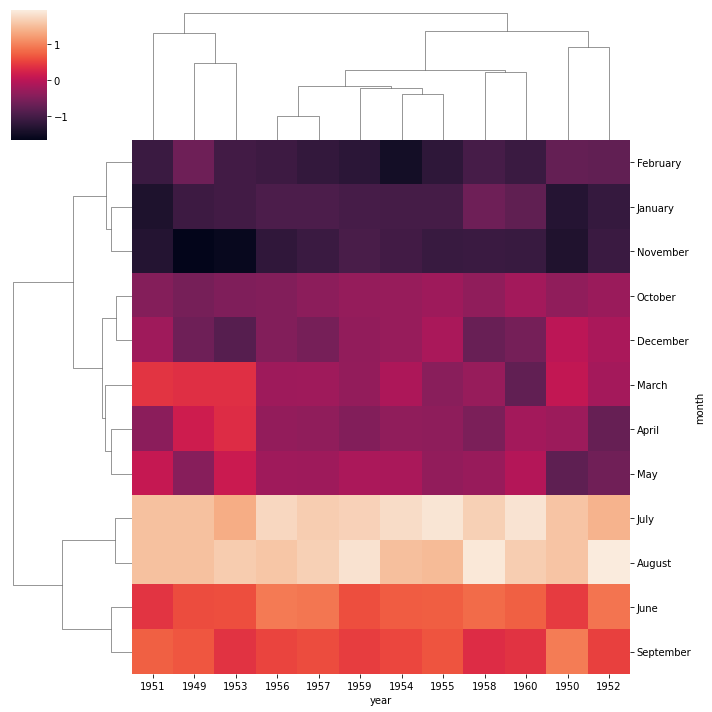

In [52]:
# Finally we can also normalize the rows by their Z-score.
# This subtracts the mean and devides by the STD of each column, then teh rows have amean of 0 and a variance of 1
sns.clustermap(flight_dframe,z_score=1)